# Capstone Project - The Battle of the Neighborhoods (Week 2)

### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find a secure place for restaurant business. Specially, this report will be targetted to stakeholders
interested in opening Japanese Restaurant in Nevada state. Since there the crimes are the main obstacle for doing any business, we will try to detect city and neighborhood which is more secure for profitable business.
We use the knowlegde we got in data science to generate coordinates of cities and neighborhoods based on the number of crimes in those cities.The security is key to consider for doing business  


## Data 


Based on definition of our problem, factors that will influence our decission are:
* The place that minimize numver of all types of crimes.
* The place that doesn't have many restaurant 
* City where the number of population is high to get clients for the business


Different types of crime data reported in 36 State in 2017 from https://en.wikipedia.org/wiki/List_of_United_States_cities_by_crime_rate.
 Those types are: violent crime, property crime and arson crime. In total xxx rows and xx columns.
Some rows and columns have not considered in the analysis as they don’t included in the in the interested place
**Geocoder with OpenCageGeocode** are used to get coordinates of Nevada State and other cities
**Foursquare API**  helps to collect data to locate different places and get coordinates of states, cities and their neighborhoods
The interested state is Nevada and the analysis is most based on that state that has 121 cities, crimes reported are for four cities.  The information is from:
https://www.nevada-demographics.com/cities_by_population
http://www.city-data.com/nbmaps/neigh-Henderson-Nevada.html.


In [87]:
pip install install geocoder

Note: you may need to restart the kernel to use updated packages.


In [88]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [89]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping 

#!conda install -c conda-forge geocoder --yes
#print ("install geocoder")
#!conda install -c conda-forge/label/gcc7 geocoder --yes
#print ("install geocoder2")
#!conda install -c conda-forge/label/cf201901 geocoder --yes
#print ("install geocoder3")
#!conda install -c conda-forge/label/cf202003 geocoder --yes
#print ("install geocoder4")
import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors


#GOGO TO INSTALL
#pip install install geocoder

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


#### Make sure we have created our foursquare account

The ID and secret are hidden for security raison

In [86]:
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20210126'      #20180604
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
CLIENT_SECRET:XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


# Data

### Read and show all data used.
#### Read and show US states cities and Nevada cities.

In [91]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ce290b4cbe3d4a0591b4cc929cdb1210 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='iNoQaf550a-1JCLptqE0VyGFv2vHMXRKF2wvJteaplha',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ce290b4cbe3d4a0591b4cc929cdb1210.get_object(Bucket='clusteringneighborhoodsintoronto-donotdelete-pr-5kqyetupvayuvp',Key='Nevada_Cities2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_6 = pd.read_csv(body)
df_data_6.head(10)
#df_data_6.shape
#df_data_6.isnull()

,Rank,City,Population
0,1,Las Vegas,"634,773"
1,2,Henderson,"300,116"
2,3,Reno,"246,500"
3,4,North Las Vegas,"241,369"
4,5,Paradise,"235,087"
5,6,Spring Valley,"207,127"
6,7,Sunrise Manor,"193,781"
7,8,Enterprise,"171,108"
8,9,Sparks,"100,589"
9,10,Carson City,"54,773"


In [92]:
df_data_4 = df_data_6
df_data_4.head()


,Rank,City,Population
0,1,Las Vegas,"634,773"
1,2,Henderson,"300,116"
2,3,Reno,"246,500"
3,4,North Las Vegas,"241,369"
4,5,Paradise,"235,087"


###  Read data about crimes in different US states

In [93]:

body = client_ce290b4cbe3d4a0591b4cc929cdb1210.get_object(Bucket='clusteringneighborhoodsintoronto-donotdelete-pr-5kqyetupvayuvp',Key='List of United States cities by crime rate.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_7 = pd.read_csv(body)
df_data_7.head()
#df_data_7.shape

,State,City,Population,Violent crime Total,Murder and Nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Totalll,Burglary,Larceny_theft,Motor_vehicle_theft,Arson
0,Alabama,Mobile3,248431,740.25,20.13,58.16,177.11,485.85,5453.83,1216.84,3730.21,506.78,22.94
1,Alaska,Anchorage,296188,1203.29,9.12,132.01,262.67,799.49,5415.82,748.17,3619.66,1047.98,20.93
2,Arizona,Chandler,249355,259.47,2.01,52.13,56.95,148.38,2329.61,314.41,1866.01,149.18,NaN
3,Arizona,Gilbert,242090,85.51,2.07,16.11,21.07,46.26,1385.85,192.49,1137.59,55.76,12.39
4,Arizona,Glendale,249273,488.22,4.81,38.91,192.96,251.53,4530.37,637.45,3426.36,466.56,19.26


In [94]:
df_data_7.shape

(100, 13)

In [95]:
# Rename Columns Totall to Property crime Total
df_data_7.rename(columns = {'Totalll':'Property crime Total'}, inplace = True)
df_data_7.head()

,State,City,Population,Violent crime Total,Murder and Nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Property crime Total,Burglary,Larceny_theft,Motor_vehicle_theft,Arson
0,Alabama,Mobile3,248431,740.25,20.13,58.16,177.11,485.85,5453.83,1216.84,3730.21,506.78,22.94
1,Alaska,Anchorage,296188,1203.29,9.12,132.01,262.67,799.49,5415.82,748.17,3619.66,1047.98,20.93
2,Arizona,Chandler,249355,259.47,2.01,52.13,56.95,148.38,2329.61,314.41,1866.01,149.18,NaN
3,Arizona,Gilbert,242090,85.51,2.07,16.11,21.07,46.26,1385.85,192.49,1137.59,55.76,12.39
4,Arizona,Glendale,249273,488.22,4.81,38.91,192.96,251.53,4530.37,637.45,3426.36,466.56,19.26


In [96]:
#Number of states
len(df_data_7['State'].unique())
print("The number of states is:", len(df_data_7['State'].unique()) )

The number of states is: 36


In [97]:
###TO REMOVE BEFORE SUBMIT


#Plot states with their crimes totals
#states_crime_tot = df_data_7[df_data_7, columns =['Violent crime Total','Totalll','','Arson']]
#nevada_crime_violent = pd.DataFrame (df_nevada, columns = ['City','Population','Murder and Nonnegligent manslaughter','Rape1','Robbery','Aggravated assault'])
states_crime_tot = pd.DataFrame (df_data_7, columns = ['State','Violent crime Total','Property crime Total','Arson'])
states_crime_tot

,State,Violent crime Total,Property crime Total,Arson
0,Alabama,740.25,5453.83,22.94
1,Alaska,1203.29,5415.82,20.93
2,Arizona,259.47,2329.61,NaN
3,Arizona,85.51,1385.85,12.39
4,Arizona,488.22,4530.37,19.26
...,...,...,...,...
95,Virginia,137.56,1934.62,11.22
96,Washington,632.69,5258.64,20.66
97,Washington,626.54,7231.44,23.03
98,Wisconsin,374.44,2662.11,3.91


## Methodology

In this project we try to find a secure place that is populous and has less number of restaurant.We will limit our analysis to area 2000 m. In the previous step we checked the security in the different cities in Nevada and we choose Nenderson as the city and calculated coordinates of its neighborhoods.
In the third final step we try to analyse venues in different neighborhoods so that we can identify which restaurants availables.
Then we must identify neighborhoods which should be a starting point for exploration and search for optimal venue location by stakeholders with restaurant business project.

## Analysis

After we have crime data, it is important to check for all state to get information on security in those state.
Let start by analysing all types of crimes in different states

### Crime by State

In [98]:
statecrime=states_crime_tot.groupby('State').sum()
statecrime

,Violent crime Total,Property crime Total,Arson
State,,,
Alabama,740.25,5453.83,22.94
Alaska,1203.29,5415.82,20.93
Arizona,2968.97,21512.24,86.32
California,10685.49,54086.78,504.10
Colorado,1808.15,9887.50,61.06
District of Columbia,948.74,4156.22,0.00
Florida,3457.74,21265.32,72.67
Georgia,1398.38,8207.72,22.78
Hawaii,246.37,2774.38,33.02


### Violent crime by State

In [99]:
#statecrime.sort_values('Violent crime Total', inplace=True, ascending=False)

statecrime.sort_values('Violent crime Total', inplace=True, ascending=False)
statecrime.head(10)

,Violent crime Total,Property crime Total,Arson
State,,,
California,10685.49,54086.78,504.10
Texas,6165.72,36934.39,175.22
Missouri,3806.60,10585.03,106.23
Florida,3457.74,21265.32,72.67
Tennessee,3141.49,10115.79,66.29
Ohio,3017.29,17914.60,109.10
Arizona,2968.97,21512.24,86.32
Nevada,2492.26,10248.18,24.39
Louisiana,2148.22,9837.87,83.32


### Property crime by State

In [100]:
statecrime.sort_values('Property crime Total', inplace=True, ascending=False)
statecrime.head(10)


,Violent crime Total,Property crime Total,Arson
State,,,
California,10685.49,54086.78,504.10
Texas,6165.72,36934.39,175.22
Arizona,2968.97,21512.24,86.32
Florida,3457.74,21265.32,72.67
Ohio,3017.29,17914.60,109.10
Washington,1259.23,12490.08,43.69
North Carolina8,0.00,11203.57,72.38
Missouri,3806.60,10585.03,106.23
Nevada,2492.26,10248.18,24.39


In [101]:
statecrime.sort_values('Arson', inplace=True, ascending=False)
statecrime.head(10)

,Violent crime Total,Property crime Total,Arson
State,,,
California,10685.49,54086.78,504.10
Texas,6165.72,36934.39,175.22
Michigan,2056.67,4540.60,129.55
Ohio,3017.29,17914.60,109.10
Missouri,3806.60,10585.03,106.23
Arizona,2968.97,21512.24,86.32
Louisiana,2148.22,9837.87,83.32
New York,1558.15,5284.73,74.95
Florida,3457.74,21265.32,72.67


## Percentages of crimes total in different states

In [102]:
#cols = ['<80%', '80-90', '>90']
#df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)
cols= ['Violent crime Total', 'Property crime Total', 'Arson']
#statecrime[cols] = statecrime[cols].div(statecrime[cols].sum(axis=1), axis=0).multiply(100)
statecrime[cols] = statecrime[cols].div(statecrime[cols].sum(axis=1), axis=0).multiply(100) 
statecrime.head(10)

,Violent crime Total,Property crime Total,Arson
State,,,
California,16.369614,82.858131,0.772255
Texas,14.247656,85.347449,0.404896
Michigan,30.574179,67.499948,1.925873
Ohio,14.340057,85.141431,0.518512
Missouri,26.256289,73.010982,0.732729
Arizona,12.084935,87.563707,0.351358
Louisiana,17.798882,81.510778,0.690340
New York,22.523682,76.392886,1.083432
Florida,13.944901,85.762024,0.293075


## Total percentage of crime in Nevada

In [103]:
#Adding index to the statecrime dataframe
statecrime.reset_index(inplace=True)

statecrime.loc[statecrime['State'] == 'Nevada']

,State,Violent crime Total,Property crime Total,Arson
23,Nevada,19.524428,80.2845,0.191072


We see that Nevada State which is our interest state has small percentage in violent crime and that is a good information about security

## Plotting Crimes in different states

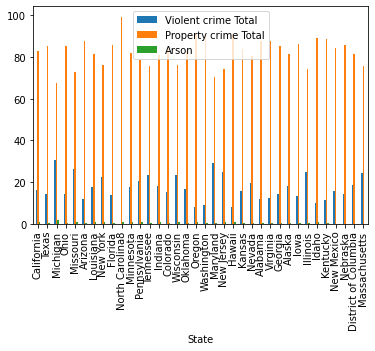

In [104]:
statecrime.plot(x="State", y=["Violent crime Total", "Property crime Total", "Arson"], kind="bar")

### Crimes data in Nevada for 4 Cities 

In the report the data of four cities has reported

In [105]:
#CRIMES DANS LES CITIES IN NEVADA
df_data_5 = df_data_7
df_nevada=df_data_5[(df_data_5['State'] == "Nevada")]
df_nevada


,State,City,Population,Violent crime Total,Murder and Nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Property crime Total,Burglary,Larceny_theft,Motor_vehicle_theft,Arson
58,Nevada,Henderson,299285,185.11,3.34,28.74,80.19,72.84,1833.04,363.87,1254.99,214.18,7.02
59,Nevada,Las Vegas,627244,618.90,12.60,79.64,211.15,315.50,2943.38,805.17,1635.16,503.06,5.59
60,Nevada,North Las Vegas,242537,1014.69,9.07,47.83,232.95,724.84,2386.03,804.00,1037.37,544.66,4.54
61,Nevada,Reno,248531,673.56,7.64,57.14,153.70,455.07,3085.73,541.98,1967.56,576.19,7.24


### Nevada violent crime

In [106]:
#CRIMES VILOLENTS
#df = pd.DataFrame(data, columns = ['Name', 'Age'])
nevada_crime_violent = pd.DataFrame (df_nevada, columns = ['City','Population','Murder and Nonnegligent manslaughter','Rape1','Robbery','Aggravated assault'])
nevada_crime_violent

,City,Population,Murder and Nonnegligent manslaughter,Rape1,Robbery,Aggravated assault
58,Henderson,299285,3.34,28.74,80.19,72.84
59,Las Vegas,627244,12.60,79.64,211.15,315.50
60,North Las Vegas,242537,9.07,47.83,232.95,724.84
61,Reno,248531,7.64,57.14,153.70,455.07


In [107]:
#Sort data based on population
nevada_crime_violent.sort_values('Population', 
                      inplace=True, 
                      ascending=False)
nevada_crime_violent

,City,Population,Murder and Nonnegligent manslaughter,Rape1,Robbery,Aggravated assault
59,Las Vegas,627244,12.60,79.64,211.15,315.50
58,Henderson,299285,3.34,28.74,80.19,72.84
61,Reno,248531,7.64,57.14,153.70,455.07
60,North Las Vegas,242537,9.07,47.83,232.95,724.84


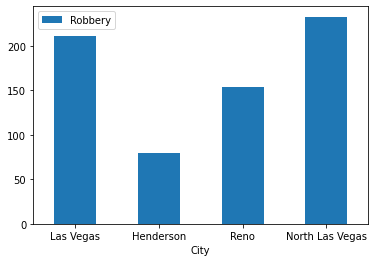

In [90]:
import matplotlib as plt
ax = nevada_crime_violent.plot.bar(x='City', y='Robbery', rot=0)

### Plotting different types of Violent crimes in Nevada

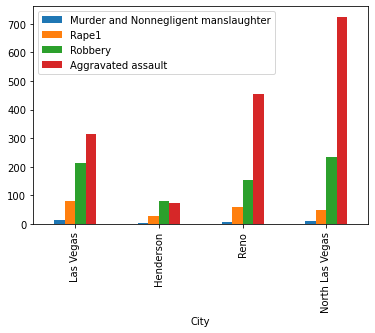

In [108]:
nevada_crime_violent.plot(x="City", y=["Murder and Nonnegligent manslaughter", "Rape1", "Robbery", "Aggravated assault"], kind="bar")

In [109]:
nevad_property_crime = pd.DataFrame(df_nevada, columns = ['City','Population','Burglary','Larceny_theft','Motor_vehicle_theft'])
nevad_property_crime #GOGOGOO

,City,Population,Burglary,Larceny_theft,Motor_vehicle_theft
58,Henderson,299285,363.87,1254.99,214.18
59,Las Vegas,627244,805.17,1635.16,503.06
60,North Las Vegas,242537,804.00,1037.37,544.66
61,Reno,248531,541.98,1967.56,576.19


### Plotting different types of Property crimes in Nevada

The property crime types are are displayed for each city. 
That can help to locate the city that minimaze the crimes

In [110]:
#LET TRY TO PLOT AFTER SORTING PROPERTY CRIMES 
#Sort data based on population
nevad_property_crime.sort_values('Population', 
                      inplace=True, 
                      ascending=False)
nevad_property_crime

,City,Population,Burglary,Larceny_theft,Motor_vehicle_theft
59,Las Vegas,627244,805.17,1635.16,503.06
58,Henderson,299285,363.87,1254.99,214.18
61,Reno,248531,541.98,1967.56,576.19
60,North Las Vegas,242537,804.00,1037.37,544.66


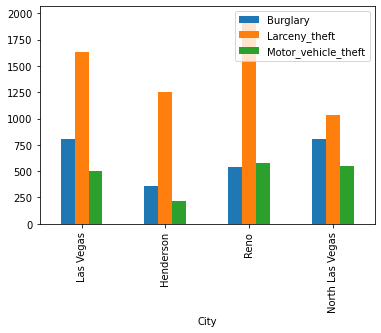

In [111]:
#PLOT SORTED DATAFRAME
nevad_property_crime.plot(x="City", y=['Burglary','Larceny_theft','Motor_vehicle_theft'], kind="bar")

### Nevada Arson crime

In [112]:
nevada_arson_crime = pd.DataFrame(df_nevada, columns = ['City','Population','Arson'])
#nevada_arson_crime
nevada_arson_crime.sort_values('Population', inplace=True, ascending=False)
nevada_arson_crime

,City,Population,Arson
59,Las Vegas,627244,5.59
58,Henderson,299285,7.02
61,Reno,248531,7.24
60,North Las Vegas,242537,4.54


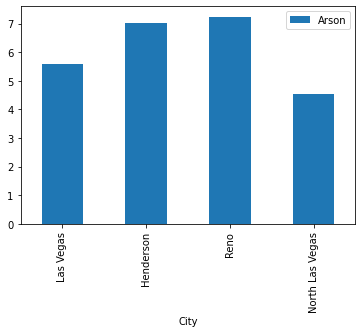

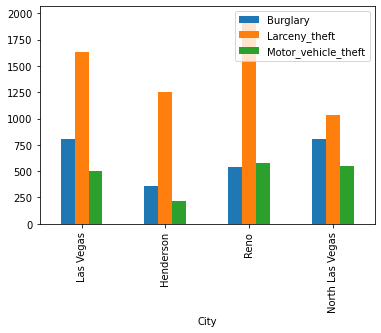

In [38]:
#Ploting Arson crime  and Property crime
nevada_arson_crime.plot(x='City', y='Arson', kind="bar")
nevad_property_crime.plot(x="City", y=['Burglary','Larceny_theft','Motor_vehicle_theft'], kind="bar")

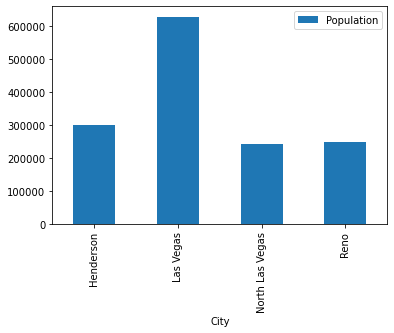

In [113]:

city_pop= pd.DataFrame(df_nevada, columns =['City','Population'])
#city_pop
#nevad_property_crime.plot(x="City", y=['Burglary','Larceny_theft','Motor_vehicle_theft'], kind="bar")
city_pop.plot(x='City', y='Population', kind="bar")

In [114]:
nevad_property_crime.sort_values('Larceny_theft', ascending=False)

,City,Population,Burglary,Larceny_theft,Motor_vehicle_theft
61,Reno,248531,541.98,1967.56,576.19
59,Las Vegas,627244,805.17,1635.16,503.06
58,Henderson,299285,363.87,1254.99,214.18
60,North Las Vegas,242537,804.00,1037.37,544.66


In [115]:
#WHERE IS LESS lARCENY_THEFT?

nevprocrime5lst=nevad_property_crime.sort_values('Larceny_theft', ascending=False)       #Sort by Lacrceny_theft   by descending order
nevprocrime5lst.tail()

,City,Population,Burglary,Larceny_theft,Motor_vehicle_theft
61,Reno,248531,541.98,1967.56,576.19
59,Las Vegas,627244,805.17,1635.16,503.06
58,Henderson,299285,363.87,1254.99,214.18
60,North Las Vegas,242537,804.00,1037.37,544.66


## Opencage

In [116]:

!pip install opencage

### Calculate Latitude and Longetude de Henderson

In [117]:
# Import required package for obtaining Latitude and Longitude of each cities
# Need to get Latitude & Longitude of Jakarta city and the districts
# Get API key from the service provider (Open Cage Geocode)
#!pip install opencage
from opencage.geocoder import OpenCageGeocode
key = '8d39f128950e4fc2946ddcbaa6873202'
geocoder = OpenCageGeocode(key)
query = 'Nevada, Henderson'  
results = geocoder.geocode(query)
# print (results)
# Isolate only the Latitude & Longitude of Jakarta from the Json file
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng']
print ('The Latitude and Longitude of Henderson is {} and {} reprectively.'.format(lat, lng))

The Latitude and Longitude of Henderson is 36.0301134 and -114.9826194 reprectively.


### Calculate Latitudes and Longetudes of all cities with crimes in Nevada

### Calculate latitude and Longetude de Handerson

In [118]:
#Dataframe of Cities and Population
#nevad_property_crime = pd.DataFrame(df_nevada, columns = ['City','Population','Burglary','Larceny_theft','Motor_vehicle_theft'])
nevada_city_population = pd.DataFrame(df_data_4, columns = ['City','Population'])
nevada_city_population

nevada_city_population['State']= 'Nevada'
nevada_city_population

,City,Population,State
0,Las Vegas,"634,773",Nevada
1,Henderson,"300,116",Nevada
2,Reno,"246,500",Nevada
3,North Las Vegas,"241,369",Nevada
4,Paradise,"235,087",Nevada
...,...,...,...
114,Paradise Valley,51,Nevada
115,Bennett Springs,46,Nevada
116,Oasis,38,Nevada
117,Logan Creek,37,Nevada


## Latitudes and Longitudes for Nevada cities

In [119]:
# Get latitude and longitude of all districts
list_lat = []   # create empty lists for latitude
list_long = []  # create empty lists for longitude
#for index, row in df_cases.iterrows(): # iterate over rows in dataframe   # THIS MUST BE dTAFRAME DE CITIES OF NEVADA   #nevada_city_population  df
for index, row in nevada_city_population.iterrows(): # iterate over rows in dataframe   # THIS MUST BE dTAFRAME DE CITIES OF NEVADA   #nevada_city_population  df    
    #District = row['DISTRICT']   
    City = row['City'] 
    query = str(City)+', Nevada'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list_lat.append(lat)
    list_long.append(long)
# create new columns from lists    
nevada_city_population['Latitude'] = list_lat   
nevada_city_population['Longitude'] = list_long
nevada_city_population

,City,Population,State,Latitude,Longitude
0,Las Vegas,"634,773",Nevada,36.167256,-115.148516
1,Henderson,"300,116",Nevada,36.030113,-114.982619
2,Reno,"246,500",Nevada,39.526121,-119.812658
3,North Las Vegas,"241,369",Nevada,36.200584,-115.121584
4,Paradise,"235,087",Nevada,36.115086,-115.173414
...,...,...,...,...,...
114,Paradise Valley,51,Nevada,41.493638,-117.534319
115,Bennett Springs,46,Nevada,34.037499,-84.648126
116,Oasis,38,Nevada,41.032618,-114.472131
117,Logan Creek,37,Nevada,37.611885,-115.392385


### Now we have Coordinnates of Henderson city: Latitude:36.030113	Longitude:-114.982619

Show the map of Henderson City

Let look for Neighborhoods of Henderson

Note: Pleas use the link to see the map if it doesn't open on Github: [Henderson map](https://github.com/Gogo827/Coursera_Capstone.-/blob/main/Henderson%20map.JPG)

In [120]:
# Define the map object and then display using the specified latitude and longitude values
map_Henderson = folium.Map(location=[36.030113, -114.982619], zoom_start=12)
map_Henderson

## Methodology

In this project we try to find a secure place that is populous and has less number of restaurant.We will limit our analysis to area 2000 m. In the previous step we checked the security in the different cities in Nevada and we choose Nenderson as the city and calculated coordinates of its neighborhoods.
In the third final step we try to analyse venues in different neighborhoods so that we can identify which restaurants availables. Then we must identify neighborhoods which should be a starting point for exploration and search for optimal venue location by stakeholders with restaurant business project.

### Create a dataframe for Henderson neighborhoods

In [121]:
list_neighbor = ["Anthem", "Black Hills", "Black Mountain", "Calico Ridge", "Canyons At Macdonald Ranch", "Clark County", "Cornerstone", 
"Del Webb Anthem", "Del Webb Macdonald Ranch", "Foothills", "Gibson Springs", "Golf Village South", "Green Valley",
 "Green Valley North", "Green Valley Ranch", "Green Valley South", "Green Valley South Legacy", "Henderson", "Highland Hills",
 "Lake Las Vegas", "Macdonald Highlands", "Macdonald Ranch", "Mccullough Hills", "Midway", "Mission Hills", "Old Vegas", "Palm Hills",
 "Paradise Hills", "Pittman", "River Mountain", "Serene", "Seven Hills", "Southfork", "Sunridge At Macdonald Ranch", "Townsite",
 "Valley View", "Water Street District", "West Henderson", "Westgate", "Whitney", "Whitney Ranch"]

print(list_neighbor)
print ("Henderson has:" ,len(list_neighbor) ,"neighborhoods")

['Anthem', 'Black Hills', 'Black Mountain', 'Calico Ridge', 'Canyons At Macdonald Ranch', 'Clark County', 'Cornerstone', 'Del Webb Anthem', 'Del Webb Macdonald Ranch', 'Foothills', 'Gibson Springs', 'Golf Village South', 'Green Valley', 'Green Valley North', 'Green Valley Ranch', 'Green Valley South', 'Green Valley South Legacy', 'Henderson', 'Highland Hills', 'Lake Las Vegas', 'Macdonald Highlands', 'Macdonald Ranch', 'Mccullough Hills', 'Midway', 'Mission Hills', 'Old Vegas', 'Palm Hills', 'Paradise Hills', 'Pittman', 'River Mountain', 'Serene', 'Seven Hills', 'Southfork', 'Sunridge At Macdonald Ranch', 'Townsite', 'Valley View', 'Water Street District', 'West Henderson', 'Westgate', 'Whitney', 'Whitney Ranch']
Henderson has: 41 neighborhoods


In [122]:
#Create Data frame for all neighborhoods
df_neighbor = pd.DataFrame(list_neighbor, columns =['Henderson_Neighborhood'])
df_neighbor

,Henderson_Neighborhood
0,Anthem
1,Black Hills
2,Black Mountain
3,Calico Ridge
4,Canyons At Macdonald Ranch
5,Clark County
6,Cornerstone
7,Del Webb Anthem
8,Del Webb Macdonald Ranch
9,Foothills


In [123]:
#Add states to facilitate processing
df_neighbor['City']= 'Henderson'
df_neighbor


,Henderson_Neighborhood,City
0,Anthem,Henderson
1,Black Hills,Henderson
2,Black Mountain,Henderson
3,Calico Ridge,Henderson
4,Canyons At Macdonald Ranch,Henderson
5,Clark County,Henderson
6,Cornerstone,Henderson
7,Del Webb Anthem,Henderson
8,Del Webb Macdonald Ranch,Henderson
9,Foothills,Henderson


In [124]:
#Get Latidtudes and Longetudes of all Neighborhoods

# Get latitude and longitude of all districts
list_lat = []   # create empty lists for latitude
list_long = []  # create empty lists for longitude
#for index, row in df_cases.iterrows(): # iterate over rows in dataframe   # THIS MUST BE dTAFRAME DE CITIES OF NEVADA   #nevada_city_population  df
for index, row in df_neighbor.iterrows(): # iterate over rows in dataframe   # THIS MUST BE dTAFRAME DE CITIES OF NEVADA   #nevada_city_population  df    
    #District = row['DISTRICT']   
    City = row['Henderson_Neighborhood'] 
    query = str(City)+', Henderson'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list_lat.append(lat)
    list_long.append(long)
# create new columns from lists    
df_neighbor['Latitude'] = list_lat   
df_neighbor['Longitude'] = list_long
df_neighbor


,Henderson_Neighborhood,City,Latitude,Longitude
0,Anthem,Henderson,35.949582,-115.102098
1,Black Hills,Henderson,35.996879,-114.984676
2,Black Mountain,Henderson,35.402889,-82.687071
3,Calico Ridge,Henderson,36.081107,-114.950406
4,Canyons At Macdonald Ranch,Henderson,35.990972,-115.079561
5,Clark County,Henderson,36.010216,-114.945596
6,Cornerstone,Henderson,36.037199,-115.053003
7,Del Webb Anthem,Henderson,36.039700,-114.981940
8,Del Webb Macdonald Ranch,Henderson,36.039700,-114.981940
9,Foothills,Henderson,36.050286,-114.949043


### We want to do the business in Whitney Neighborhood

In [126]:
df_neighbor.loc[39, 'Henderson_Neighborhood']    

'Whitney'

In [127]:
#find The coordinate even if we have it in the dataframe just to verify

#FIND LATITUDE AND LONGITUDE DE 'Whitney'

neighborhood_latitude = df_neighbor.loc[39, 'Latitude'] # neighborhood latitude value
neighborhood_longitude =df_neighbor.loc[39, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_neighbor.loc[39, 'Henderson_Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Whitney are 36.0758075, -115.0702736.


## Foursquare

### Getting the top 100 venues that are in Whitney within a radius of 500 meters. First, reate the GET request URL. Name the URL url.

In [132]:
LIMIT = 100 # limit of number of venues returned by Foursquare API    
radius = 2000 # define radius  500 replace it by 2000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude,     #Latitudes de Whitney   càd   (39, 'Latitude) In the dataframe df_neighbor
    neighborhood_longitude,    #Longitude de Whitney   càd   (39, 'Latitude) In the dataframe df_neighbor
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=0TOVTMADLWR2W1MJSGHDQIILIHNRS4FETOIADN413DH34FYL&client_secret=URLEPE0U0TMEJAR4CCGHF32SPKENL2Q2HL1AYJSEIZERFUUS&v=20210126&ll=36.0758075,-115.0702736&radius=2000&limit=100'

### Display 100 venues returned in Json file

In [136]:
#DISPLAY ALL 100 VENUES IN RADIUS = 500   /2000
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60400a0e0ebed766cb21a91b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Green Valley North',
  'headerFullLocation': 'Green Valley North, Henderson',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 67,
  'suggestedBounds': {'ne': {'lat': 36.09380751800002,
    'lng': -115.04804450817845},
   'sw': {'lat': 36.05780748199999, 'lng': -115.09250269182154}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd258eb41b9ef3baa04fee5',
       'name': 'The Chicken Shack',
       'location': {'address': '4606 E Sunset Rd',
        'crossStreet': 'at S Mountain Vista St',
        'lat': 36.0724381

In [137]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Now we are ready to clean the json and structure it into a pandas dataframe.

In [138]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,The Chicken Shack,Fried Chicken Joint,36.072438,-115.073292
1,Smith's,Grocery Store,36.072539,-115.073512
2,Galaxy Green Valley Luxury+,Movie Theater,36.072036,-115.076589
3,Ross J's Aloha Grill,Hawaiian Restaurant,36.071420,-115.072310
4,Ethel M Chocolate Factory & Cactus Garden,Chocolate Shop,36.073898,-115.071755
5,Todd's Unique Dining,Restaurant,36.071320,-115.078743
6,Weiss Deli and Bakery,Deli / Bodega,36.069709,-115.079936
7,Baskin-Robbins,Ice Cream Shop,36.072025,-115.072288
8,Trader Joe's,Grocery Store,36.069659,-115.081100
9,Go Float Yourself,Spa,36.072036,-115.076645


In [139]:
nearby_venues.shape

(67, 4)

In [140]:
nearby_venues

,name,categories,lat,lng
0,The Chicken Shack,Fried Chicken Joint,36.072438,-115.073292
1,Smith's,Grocery Store,36.072539,-115.073512
2,Galaxy Green Valley Luxury+,Movie Theater,36.072036,-115.076589
3,Ross J's Aloha Grill,Hawaiian Restaurant,36.071420,-115.072310
4,Ethel M Chocolate Factory & Cactus Garden,Chocolate Shop,36.073898,-115.071755
...,...,...,...,...
62,Felipito's Mexican Food,Mexican Restaurant,36.064304,-115.059144
63,Whitney Ranch & Russell,Intersection,36.082343,-115.053865
64,Action Plumbing,Construction & Landscaping,36.060751,-115.073170
65,Resort Villas Gym (Private),Gym,36.059497,-115.073792


In [141]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

67 venues were returned by Foursquare.


### Let explore the other Neighborhoods in Henderson

Create function to get all venues (def getNearbyVenues)

In [142]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

### The code to run the function "getNearbyVenues" on each neighborhood & create a new dataframe called Henderson_venues.

In [143]:

#Henderson_venues
henderson_venues = getNearbyVenues(names=df_neighbor['Henderson_Neighborhood'],    #GOGO toronto_data replaced by df_neighbor
                                   latitudes=df_neighbor['Latitude'],
                                   longitudes=df_neighbor['Longitude']
                                  )


Anthem
Black Hills
Black Mountain
Calico Ridge
Canyons At Macdonald Ranch
Clark County
Cornerstone
Del Webb Anthem
Del Webb Macdonald Ranch
Foothills
Gibson Springs
Golf Village South
Green Valley
Green Valley North
Green Valley Ranch
Green Valley South
Green Valley South Legacy
Henderson
Highland Hills
Lake Las Vegas
Macdonald Highlands
Macdonald Ranch
Mccullough Hills
Midway
Mission Hills
Old Vegas
Palm Hills
Paradise Hills
Pittman
River Mountain
Serene
Seven Hills
Southfork
Sunridge At Macdonald Ranch
Townsite
Valley View
Water Street District
West Henderson
Westgate
Whitney
Whitney Ranch


In [144]:
#Let's check the size of the resulting dataframe

print(henderson_venues.shape)
henderson_venues.head(10)
#henderson_venues.tail(60)

(422, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Black Hills,35.996879,-114.984676,Beach Bums Hawaiian Ice,35.997593,-114.988578,Restaurant
1,Black Hills,35.996879,-114.984676,Speedee Mart,35.997463,-114.988763,Convenience Store
2,Black Hills,35.996879,-114.984676,Purple Penguin Snow Cone Shack,35.997425,-114.988785,Dessert Shop
3,Calico Ridge,36.081107,-114.950406,Lake Mead Lake Las Vegas Entrance,36.079584,-114.949709,Park
4,Calico Ridge,36.081107,-114.950406,Local Hawaiian Wear,36.080403,-114.955824,Clothing Store
5,Canyons At Macdonald Ranch,35.990972,-115.079561,Blackrock by Pulte Homes,35.990673,-115.079913,Residential Building (Apartment / Condo)
6,Canyons At Macdonald Ranch,35.990972,-115.079561,"All Temp Refrigeration & Air Conditioning, LLC",35.993411,-115.080183,Home Service
7,Clark County,36.010216,-114.945596,Clark County Museum,36.009978,-114.945485,History Museum
8,Clark County,36.010216,-114.945596,Las Vegas Engineers,36.012406,-114.945614,Business Service
9,Cornerstone,36.037199,-115.053003,Cornerstone Park,36.036461,-115.054873,Park


### Let's check how many venues were returned for each neighborhood

In [145]:
henderson_venues.groupby('Neighborhood').count()

#groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Black Hills,3,3,3,3,3,3
Calico Ridge,2,2,2,2,2,2
Canyons At Macdonald Ranch,2,2,2,2,2,2
Clark County,2,2,2,2,2,2
Cornerstone,1,1,1,1,1,1
Del Webb Anthem,24,24,24,24,24,24
Del Webb Macdonald Ranch,24,24,24,24,24,24
Gibson Springs,14,14,14,14,14,14
Golf Village South,3,3,3,3,3,3


In [147]:
henderson_venues.shape

(422, 7)

### Venues by neighborhood

In [148]:
henderson_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Black Hills,35.996879,-114.984676,Beach Bums Hawaiian Ice,35.997593,-114.988578,Restaurant
1,Black Hills,35.996879,-114.984676,Speedee Mart,35.997463,-114.988763,Convenience Store
2,Black Hills,35.996879,-114.984676,Purple Penguin Snow Cone Shack,35.997425,-114.988785,Dessert Shop
3,Calico Ridge,36.081107,-114.950406,Lake Mead Lake Las Vegas Entrance,36.079584,-114.949709,Park
4,Calico Ridge,36.081107,-114.950406,Local Hawaiian Wear,36.080403,-114.955824,Clothing Store
...,...,...,...,...,...,...,...
417,Whitney Ranch,36.064964,-115.048589,Grand Kebab,36.065675,-115.048012,Kebab Restaurant
418,Whitney Ranch,36.064964,-115.048589,uBreakiFix in Henderson,36.066565,-115.046622,Other Repair Shop
419,Whitney Ranch,36.064964,-115.048589,Taqueria El Buen Pastor,36.065063,-115.045552,Taco Place
420,Whitney Ranch,36.064964,-115.048589,Unique Pizza & Subs,36.063129,-115.045418,Pizza Place


In [149]:
hendrson_count_venues=henderson_venues
hendrson_count_venues


hendrson_count_venues[(hendrson_count_venues['Neighborhood'] == "Whitney Ranch")] #Whitney Ranch


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
374,Whitney Ranch,36.064964,-115.048589,Café Zupas,36.062851,-115.045617,Sandwich Place
375,Whitney Ranch,36.064964,-115.048589,AT&T,36.065267,-115.047869,Mobile Phone Shop
376,Whitney Ranch,36.064964,-115.048589,Target,36.064945,-115.047961,Big Box Store
377,Whitney Ranch,36.064964,-115.048589,Hobby Lobby,36.066029,-115.048112,Fabric Shop
378,Whitney Ranch,36.064964,-115.048589,Bangkok 9,36.064763,-115.048506,Thai Restaurant
379,Whitney Ranch,36.064964,-115.048589,Einstein Bros Bagels,36.063355,-115.047196,Bagel Shop
380,Whitney Ranch,36.064964,-115.048589,Ross Dress for Less,36.066985,-115.047385,Clothing Store
381,Whitney Ranch,36.064964,-115.048589,Tropical Smoothie Cafe,36.065597,-115.047898,Café
382,Whitney Ranch,36.064964,-115.048589,Port of Subs,36.063349,-115.046960,Sandwich Place
383,Whitney Ranch,36.064964,-115.048589,Mimi's Cafe,36.062542,-115.045794,Breakfast Spot


In [150]:

hendrson_count_venues[(hendrson_count_venues['Neighborhood'] == "Whitney")]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
362,Whitney,36.075808,-115.070274,Ethel M Chocolate Factory & Cactus Garden,36.073898,-115.071755,Chocolate Shop
363,Whitney,36.075808,-115.070274,The Chicken Shack,36.072438,-115.073292,Fried Chicken Joint
364,Whitney,36.075808,-115.070274,Smith's,36.072539,-115.073512,Grocery Store
365,Whitney,36.075808,-115.070274,Lucky Joe's Saloon,36.075873,-115.073162,Bar
366,Whitney,36.075808,-115.070274,Baskin-Robbins,36.072025,-115.072288,Ice Cream Shop
367,Whitney,36.075808,-115.070274,Cactus Garden,36.073927,-115.071496,Garden
368,Whitney,36.075808,-115.070274,Bangkok Orchid,36.071661,-115.072040,Thai Restaurant
369,Whitney,36.075808,-115.070274,Silver State Archery,36.075808,-115.072513,Sporting Goods Shop
370,Whitney,36.075808,-115.070274,Big Gun Enterprises LLC,36.075808,-115.072513,Sporting Goods Shop
371,Whitney,36.075808,-115.070274,Save On Cannabis,36.077583,-115.068504,Business Service


In [151]:

hendrson_count_venues[(hendrson_count_venues['Neighborhood'] == "Southfork")]


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
229,Southfork,36.0397,-114.98194,Capriotti's Sandwich Shop,36.041265,-114.981026,Sandwich Place
230,Southfork,36.0397,-114.98194,Albertsons,36.041608,-114.981299,Grocery Store
231,Southfork,36.0397,-114.98194,Roberto's Taco Shop,36.039164,-114.980638,Mexican Restaurant
232,Southfork,36.0397,-114.98194,Tucky's BBQ,36.042055,-114.983809,BBQ Joint
233,Southfork,36.0397,-114.98194,Dairy Queen,36.041061,-114.978608,Ice Cream Shop
234,Southfork,36.0397,-114.98194,Walgreens,36.038601,-114.982502,Pharmacy
235,Southfork,36.0397,-114.98194,Del Taco,36.041012,-114.982762,Fast Food Restaurant
236,Southfork,36.0397,-114.98194,Omelet House,36.042772,-114.984651,Breakfast Spot
237,Southfork,36.0397,-114.98194,China A Go Go,36.041417,-114.980845,Chinese Restaurant
238,Southfork,36.0397,-114.98194,Action Comics & Games,36.041771,-114.982737,Comic Shop


In [152]:
hendrson_count_venues[(hendrson_count_venues['Neighborhood'] == "Water Street District")]


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
291,Water Street District,36.032427,-114.983084,Henderson Vapor,36.033471,-114.983453,Pharmacy
292,Water Street District,36.032427,-114.983084,Emerald Island Casino,36.032544,-114.984806,Casino
293,Water Street District,36.032427,-114.983084,Henderson Events Plaza,36.030737,-114.982343,Music Venue
294,Water Street District,36.032427,-114.983084,Coo Coo's Gourmet Coffee Cafe,36.033213,-114.985477,American Restaurant
295,Water Street District,36.032427,-114.983084,Juan’s Flaming Fajitas & Cantina,36.035000,-114.985685,Mexican Restaurant
296,Water Street District,36.032427,-114.983084,Lovelady Brewing Company,36.035277,-114.985918,Brewery
297,Water Street District,36.032427,-114.983084,Public Works Coffee Bar,36.028942,-114.979584,Coffee Shop
298,Water Street District,36.032427,-114.983084,Santa Rosa Taco Shop,36.030704,-114.978043,Taco Place
299,Water Street District,36.032427,-114.983084,7-Eleven,36.034463,-114.983466,Convenience Store
300,Water Street District,36.032427,-114.983084,Rainbow Club & Casino,36.032695,-114.983708,Casino


In [81]:
hendrson_count_venues[(hendrson_count_venues['Neighborhood'] == "Green Valley Ranch")]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
85,Green Valley Ranch,36.021035,-115.091069,Pizza Rock,36.019961,-115.089392,Pizza Place
86,Green Valley Ranch,36.021035,-115.091069,Green Valley Ranch Pool,36.021997,-115.091202,Pool
87,Green Valley Ranch,36.021035,-115.091069,Green Valley Ranch Bingo,36.020974,-115.090098,Casino
88,Green Valley Ranch,36.021035,-115.091069,Hank's Fine Steaks & Martinis,36.020437,-115.089110,Steakhouse
89,Green Valley Ranch,36.021035,-115.091069,Bottiglia,36.020156,-115.088718,Italian Restaurant
90,Green Valley Ranch,36.021035,-115.091069,Tides Oyster Bar,36.020058,-115.089941,Seafood Restaurant
91,Green Valley Ranch,36.021035,-115.091069,Regal Green Valley Ranch,36.021123,-115.089073,Movie Theater
92,Green Valley Ranch,36.021035,-115.091069,Rachel's Kitchen,36.021092,-115.087501,American Restaurant
93,Green Valley Ranch,36.021035,-115.091069,Capriotti's Sandwich Shop,36.021478,-115.089146,Sandwich Place
94,Green Valley Ranch,36.021035,-115.091069,Green Valley Ranch Race & Sportsbook,36.019982,-115.089966,Casino


In [153]:
hendrson_count_venues[(hendrson_count_venues['Neighborhood'] == "Del Webb Anthem")]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
10,Del Webb Anthem,36.0397,-114.98194,Capriotti's Sandwich Shop,36.041265,-114.981026,Sandwich Place
11,Del Webb Anthem,36.0397,-114.98194,Albertsons,36.041608,-114.981299,Grocery Store
12,Del Webb Anthem,36.0397,-114.98194,Roberto's Taco Shop,36.039164,-114.980638,Mexican Restaurant
13,Del Webb Anthem,36.0397,-114.98194,Tucky's BBQ,36.042055,-114.983809,BBQ Joint
14,Del Webb Anthem,36.0397,-114.98194,Dairy Queen,36.041061,-114.978608,Ice Cream Shop
15,Del Webb Anthem,36.0397,-114.98194,Walgreens,36.038601,-114.982502,Pharmacy
16,Del Webb Anthem,36.0397,-114.98194,Del Taco,36.041012,-114.982762,Fast Food Restaurant
17,Del Webb Anthem,36.0397,-114.98194,Omelet House,36.042772,-114.984651,Breakfast Spot
18,Del Webb Anthem,36.0397,-114.98194,China A Go Go,36.041417,-114.980845,Chinese Restaurant
19,Del Webb Anthem,36.0397,-114.98194,Action Comics & Games,36.041771,-114.982737,Comic Shop


In [154]:

hendrson_count_venues[(hendrson_count_venues['Neighborhood'] == "Midway")]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
181,Midway,35.443171,-82.506232,Beef 'O' Brady's,35.446548,-82.508973,American Restaurant
182,Midway,35.443171,-82.506232,Fletcher Village Bakery,35.440529,-82.505701,Bakery
183,Midway,35.443171,-82.506232,Baabals Ice Cream,35.439073,-82.505408,Dessert Shop
184,Midway,35.443171,-82.506232,Ingles Market,35.441171,-82.506166,Supermarket
185,Midway,35.443171,-82.506232,Redbox,35.442100,-82.505750,Video Store
186,Midway,35.443171,-82.506232,Starbucks,35.441350,-82.506491,Coffee Shop
187,Midway,35.443171,-82.506232,Shell,35.446486,-82.507410,Gas Station
188,Midway,35.443171,-82.506232,BP,35.446539,-82.507153,Gas Station
189,Midway,35.443171,-82.506232,Fletcher YMCA,35.443280,-82.507518,Recreation Center
190,Midway,35.443171,-82.506232,WNC Aquarium and Imports,35.445361,-82.507795,Pet Store


In [155]:
hendrson_count_venues[(hendrson_count_venues['Neighborhood'] == "Henderson" )]


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
146,Henderson,37.836751,-87.590763,Rockhouse At Wolf's,37.838172,-87.589507,Pizza Place
147,Henderson,37.836751,-87.590763,Cancun Mexican Restaurant,37.833335,-87.594276,Mexican Restaurant
148,Henderson,37.836751,-87.590763,Papa Murphy's,37.835301,-87.591718,Pizza Place
149,Henderson,37.836751,-87.590763,Papa John's Pizza,37.836561,-87.589367,Pizza Place
150,Henderson,37.836751,-87.590763,Enterprise Rent-A-Car,37.836154,-87.590013,Rental Car Location
151,Henderson,37.836751,-87.590763,Popeyes Louisiana Kitchen,37.837849,-87.589207,Fried Chicken Joint
152,Henderson,37.836751,-87.590763,US Post Office,37.839832,-87.593856,Post Office
153,Henderson,37.836751,-87.590763,Hardee's,37.838312,-87.588692,Fast Food Restaurant
154,Henderson,37.836751,-87.590763,Walgreens,37.838782,-87.588230,Pharmacy
155,Henderson,37.836751,-87.590763,Redbox,37.839478,-87.588429,Video Store


In [156]:
hendrson_count_venues[(hendrson_count_venues['Neighborhood'] == "Valley View")]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
280,Valley View,-36.881271,174.63095,Event Cinemas,-36.880778,174.632970,Movie Theater
281,Valley View,-36.881271,174.63095,Countdown,-36.880896,174.632433,Grocery Store
282,Valley View,-36.881271,174.63095,WestCity Waitakere,-36.880797,174.632964,Shopping Mall
283,Valley View,-36.881271,174.63095,The Warehouse,-36.881117,174.632001,Department Store
284,Valley View,-36.881271,174.63095,Henderson Train Station,-36.881062,174.631105,Train Station
285,Valley View,-36.881271,174.63095,Corban Estate Art Centre,-36.877510,174.628416,Art Gallery
286,Valley View,-36.881271,174.63095,Kmart,-36.882447,174.635382,Department Store
287,Valley View,-36.881271,174.63095,Telecom Westcity,-36.880915,174.632852,Electronics Store
288,Valley View,-36.881271,174.63095,The Grounds,-36.881371,174.629261,Restaurant
289,Valley View,-36.881271,174.63095,Upper crust,-36.881011,174.632463,Bakery


## Result discussion

Based on the result, in the most population are in the cities where there is a presence of low criminality number. In Nevada city, Henderson is the city in Nevada that is more secure. Considering our result, the violent crimes are less comparing to the other cities. In that city most of neighborhoods has less than 12 venues category. We have analysed the restaurants available in 9 venues such as Whitney Ranch, Whitney, Southfork Water Street District Green Valley Ranch, Del Webb Anthem, Midway, Henderson and Valley View.

In those neighborhoods we explored we have seen that even if some neighborhoods have less population but have more than five restaurants. Example Whitney Ranch has 3 restaurants with 7.808 population, Whitney has 1 Tai restaurant category with 46.503 population, Southfork has 7 restaurants with 1,147 population, Water Street District has 8 restaurants with 4300 population, Green Valley Ranch has 8 restaurants with 17.758 population, Del Webb Anthem has 7 restaurants with 3.323 population, Midway has 5 restaurants with 2.775 population, Henderson has 5 restaurants with 469.229 population. 
Our attention was focused on Whitney. The restaurant project in Whitney is highly possible and profitable as there is only one restaurant in the Whitney neighborhood which is most populous. Compare to the other neighborhoods, some neighborhoods have many different restaurants, yet they have small number of population.
We discovered that Henderson neighborhood, which is more populous in Henderson city, can be also a good place because of a smaller number of restaurant presence.




## Conclusion

The purpose of this project was to identify the secure place to open a restaurent business in Nevada in order
to help stakeholders to get the secure location that minimize the number of crimes so that business can be profitable.
After analysing thecrime data we, got the data for Nevada which was our target state, then we continued to analyse data
to located the city that can be secure and get its coordinates. Those coordinates were use to located neighborhoods in the cities.
Based on the data provided by foursquare I located different venues in different cities and that gave me image 
of the place and type of business that can be proposed and more interestingly to restaurant business.

The city that is secured is Henderson. Based on the security and avaialability of venues specially restaurant, restaurants are rare in Henderson
especially in Whitney neighborhood where it is only Tai restaurant and it is populous. 
I recommend Whitney because of no problem of competitors, any type of restaurant is profitable.
Henderson neighborhood is also a key point to set the business because is more populous, but it has small number of restaurants.
For stakeholders, Henderson is a recommended city that can be the good choice of secure place with restaurants business.
 
